In [8]:
import sys
import matplotlib.pyplot as plt
plt.style.use('ggplot')
sys.path.append('..')

# GOJO libraries
from gojo import deepl

In [6]:
def plot(_n_layers, _layers):
    plt.subplots(figsize=(6, 3))
    for i, _layer in enumerate(_layers):
        plt.plot(list(range(1, _n_layers+1)), _layer, label='%d' % i)
        plt.scatter(list(range(1, _n_layers+1)), _layer)
    plt.legend()
    plt.show()

In [4]:
layers1 = deepl.ffn.generateParametrizedLayers(
    10,
    1000,
    'linear',
    1, 9999,
    beta=2,
    alpha=100
    
)

In [20]:
layers2 = deepl.ffn.generateParametrizedLayers(
    10,
    1000,
    'exponential',
    1, 9999,
    beta=1.5,
    alpha=100
    
)

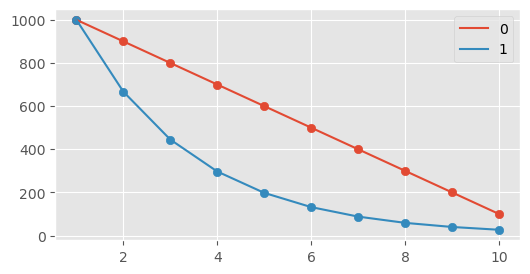

In [21]:
plot(10, [layers1, layers2])

In [3]:
assert False

AssertionError: 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [ ]:
def plot(_n_layers, _layers):
    plt.subplots(figsize=(6, 3))
    for i, _layer in enumerate(_layers):
        plt.plot(list(range(1, _n_layers+1)), _layer, label='%d' % i)
        plt.scatter(list(range(1, _n_layers+1)), _layer)
    plt.legend()
    plt.show()


In [ ]:
n_layers = 6
init = 1000
x = init
layers = [x]
for i in range(1, n_layers):
    x = np.sqrt(x)
    layers.append(x)
layers

plot(n_layers, [layers])

In [ ]:
# función parametrizada con un array
layers2 = np.ceil(np.array([init] * n_layers) * (1/2) ** np.arange(n_layers))
layers2

In [ ]:
init_layer_shape = 1000
n_layers = 5
beta = 2

In [ ]:
np.ceil(
    np.array([init_layer_shape] * n_layers) * ( (1/beta) ** np.arange(n_layers) ))

In [ ]:
alpha = 200
layers = np.ceil(
    np.array([init_layer_shape] * n_layers) - ( alpha * np.arange(n_layers)))
layers

In [ ]:
layers[layers < 500] = 500
layers

In [ ]:
plot(n_layers, [layers, layers2])

In [ ]:
layers3 = np.ceil(np.array([init] * n_layers) * (1/np.e) ** np.arange(n_layers))

In [ ]:
plot(n_layers, [layers, layers2, layers3])

In [ ]:
layers4 = np.ceil(np.array([init] * n_layers) * (1/2) ** np.arange(n_layers))

In [ ]:
plot(n_layers, [layers, layers2, layers3, layers4])